### DESCRIPCIÓN DE LOS DATOS

### Cargar paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Cargar base de datos

1. Tener lista la base de datos, archivo csv. 

In [2]:
# Saberpro_Genericas_2021="C:/Users/jaime/Dropbox (INTELLIGENT)/Machine Learning Proyecto/SaberPro_Genericas_2021.csv"
Saberpro_Genericas_2021 = "SaberPro_Genericas_2021.csv"

### Saberpro_Genericas_2021

In [3]:
Saberpro_2021 = pd.read_csv(Saberpro_Genericas_2021, sep=",", header=0, engine="python")

In [4]:
# Saberpro_2021.dtypes
Saberpro_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34997 entries, 0 to 34996
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_TIPODOCUMENTO              34997 non-null  object 
 1   ESTU_NACIONALIDAD               34997 non-null  object 
 2   ESTU_GENERO                     34997 non-null  object 
 3   ESTU_FECHANACIMIENTO            34997 non-null  object 
 4   EDAD                            34997 non-null  int64  
 5   ESTU_EXTERIOR                   34997 non-null  object 
 6   PERIODO                         34997 non-null  int64  
 7   ESTU_CONSECUTIVO                34997 non-null  object 
 8   ESTU_ESTUDIANTE                 34997 non-null  object 
 9   ESTU_PAIS_RESIDE                34997 non-null  object 
 10  ESTU_DEPTO_RESIDE               34996 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO           34996 non-null  float64
 12  ESTU_MCPIO_RESIDE               

In [5]:
print("Base de datos con " + str(Saberpro_2021.shape[0]) +" estudiantes y " + str(Saberpro_2021.shape[1]) + " columnas")

Base de datos con 34997 estudiantes y 95 columnas


### Eliminando las columnas no relevantes
Hay 48 variables que serán eliminadas:
- No es relevante para el análisis.
- Ya se dispone de una tabla donde se ha sistematizado la información.

In [6]:
deleted_cols = ['ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_MCPIO_RESIDE', 'ESTU_COLE_TERMINO', 
                'ESTU_CODDANE_COLE_TERMINO', 'ESTU_TITULOOBTENIDOBACHILLER', 'ESTU_VALORMATRICULAUNIVERSIDAD', 
                'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'ESTU_OTROCOLE_TERMINO', 'ESTU_PRESENTACIONCASA', 
                'ESTU_PAISDOCUMENTOS11', 'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA', 
                'COD_GRUPO_REFERENCIA', 'ESTU_PRGM_MUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO', 
                'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_MUNICIPIO', 'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO', 
                'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION', 
                'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'MOD_RAZONA_CUANTITAT_DESEM', 
                'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_DESEM', 
                'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_DESEM', 
                'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC', 'MOD_INGLES_DESEM', 'MOD_INGLES_PNAL', 
                'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC', 
                'PERCENTIL_NBC', 'PERCENTIL_GLOBAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_ESTADOINVESTIGACION']

Saberpro_2021 = Saberpro_2021.copy().drop(deleted_cols, axis=1)


In [7]:
print("Base de datos con " + str(Saberpro_2021.shape[0]) +" estudiantes y " + str(Saberpro_2021.shape[1]) + " columnas")

Base de datos con 34997 estudiantes y 47 columnas


### Eliminando los estudiantes menores de 15 años

In [8]:
Saberpro_2021 = Saberpro_2021.drop(Saberpro_2021[Saberpro_2021['EDAD']<15].index)

### Variables categóricas

In [9]:
categoricas = ["ESTU_TIPODOCUMENTO", 'ESTU_GENERO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_DEPTO_RESIDE', 'ESTU_AREARESIDE',
               "ESTU_PAGOMATRICULABECA", "ESTU_PAGOMATRICULACREDITO", "ESTU_PAGOMATRICULAPADRES",
              "ESTU_PAGOMATRICULAPROPIO", "ESTU_COMOCAPACITOEXAMENSB11", "ESTU_SEMESTRECURSA", "FAMI_EDUCACIONPADRE",
              "FAMI_EDUCACIONMADRE", "FAMI_ESTRATOVIVIENDA", "FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", 
               "FAMI_TIENELAVADORA", "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENESERVICIOTV", "FAMI_TIENEAUTOMOVIL",
              "FAMI_TIENEMOTOCICLETA", "FAMI_TIENECONSOLAVIDEOJUEGOS", "ESTU_HORASSEMANATRABAJA", "ESTU_METODO_PRGM",
               "INST_ORIGEN"]

In [10]:
Saberpro_2021[categoricas] = Saberpro_2021[categoricas].copy().apply(lambda x: pd.factorize(x)[0])

### Cantiddades de NAN

In [11]:
Saberpro_2021.isna().sum() > 0

ESTU_TIPODOCUMENTO              False
ESTU_GENERO                     False
ESTU_FECHANACIMIENTO            False
EDAD                            False
ESTU_EXTERIOR                   False
PERIODO                         False
ESTU_CONSECUTIVO                False
ESTU_DEPTO_RESIDE               False
ESTU_COD_RESIDE_DEPTO            True
ESTU_COD_RESIDE_MCPIO            True
ESTU_AREARESIDE                 False
ESTU_COD_COLE_MCPIO_TERMINO      True
ESTU_PAGOMATRICULABECA          False
ESTU_PAGOMATRICULACREDITO       False
ESTU_PAGOMATRICULAPADRES        False
ESTU_PAGOMATRICULAPROPIO        False
ESTU_COMOCAPACITOEXAMENSB11     False
ESTU_TIPODOCUMENTOSB11           True
ESTU_SEMESTRECURSA              False
FAMI_EDUCACIONPADRE             False
FAMI_EDUCACIONMADRE             False
FAMI_ESTRATOVIVIENDA            False
FAMI_TIENEINTERNET              False
FAMI_TIENECOMPUTADOR            False
FAMI_TIENELAVADORA              False
FAMI_TIENEHORNOMICROOGAS        False
FAMI_TIENESE

## Histograma de las variables numéricas

array([[<AxesSubplot:title={'center':'EDAD'}>,
        <AxesSubplot:title={'center':'ESTU_COD_RESIDE_DEPTO'}>,
        <AxesSubplot:title={'center':'ESTU_COD_RESIDE_MCPIO'}>,
        <AxesSubplot:title={'center':'ESTU_COD_COLE_MCPIO_TERMINO'}>,
        <AxesSubplot:title={'center':'INST_COD_INSTITUCION'}>,
        <AxesSubplot:title={'center':'ESTU_SNIES_PRGMACADEMICO'}>],
       [<AxesSubplot:title={'center':'ESTU_PRGM_CODMUNICIPIO'}>,
        <AxesSubplot:title={'center':'COD_NUCLEO_PREGRADO'}>,
        <AxesSubplot:title={'center':'ESTU_INST_CODMUNICIPIO'}>,
        <AxesSubplot:title={'center':'MOD_RAZONA_CUANTITAT_PUNT'}>,
        <AxesSubplot:title={'center':'MOD_LECTURA_CRITICA_PUNT'}>,
        <AxesSubplot:title={'center':'MOD_COMPETEN_CIUDADA_PUNT'}>],
       [<AxesSubplot:title={'center':'MOD_INGLES_PUNT'}>,
        <AxesSubplot:title={'center':'MOD_COMUNI_ESCRITA_PUNT'}>,
        <AxesSubplot:title={'center':'PUNT_GLOBAL'}>,
        <AxesSubplot:title={'center':'ESTU_INSE_IN

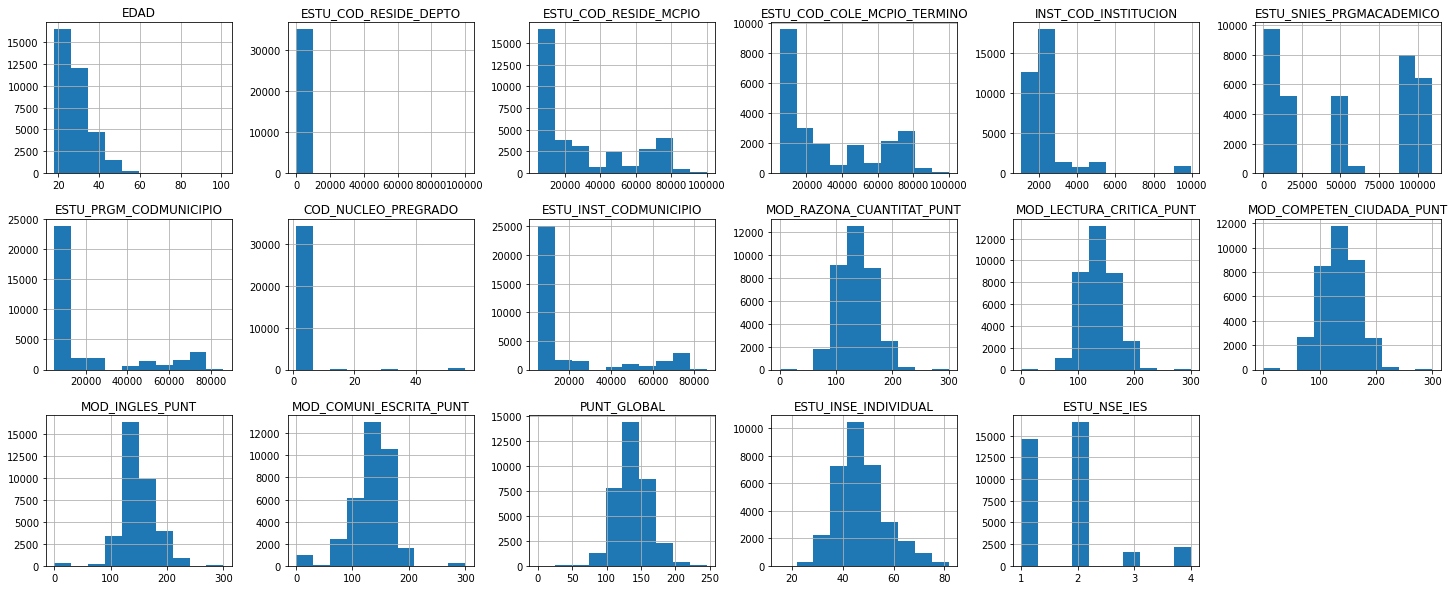

In [12]:
Saberpro_2021.loc[:,~Saberpro_2021.columns.isin(categoricas)].hist(figsize = (25,10), layout = (3,6))

EDAD                              AxesSubplot(0.125,0.772143;0.227941x0.107857)
ESTU_COD_RESIDE_DEPTO          AxesSubplot(0.398529,0.772143;0.227941x0.107857)
ESTU_COD_RESIDE_MCPIO          AxesSubplot(0.672059,0.772143;0.227941x0.107857)
ESTU_COD_COLE_MCPIO_TERMINO       AxesSubplot(0.125,0.642714;0.227941x0.107857)
INST_COD_INSTITUCION           AxesSubplot(0.398529,0.642714;0.227941x0.107857)
ESTU_SNIES_PRGMACADEMICO       AxesSubplot(0.672059,0.642714;0.227941x0.107857)
ESTU_PRGM_CODMUNICIPIO            AxesSubplot(0.125,0.513286;0.227941x0.107857)
COD_NUCLEO_PREGRADO            AxesSubplot(0.398529,0.513286;0.227941x0.107857)
ESTU_INST_CODMUNICIPIO         AxesSubplot(0.672059,0.513286;0.227941x0.107857)
MOD_RAZONA_CUANTITAT_PUNT         AxesSubplot(0.125,0.383857;0.227941x0.107857)
MOD_LECTURA_CRITICA_PUNT       AxesSubplot(0.398529,0.383857;0.227941x0.107857)
MOD_COMPETEN_CIUDADA_PUNT      AxesSubplot(0.672059,0.383857;0.227941x0.107857)
MOD_INGLES_PUNT                   AxesSu

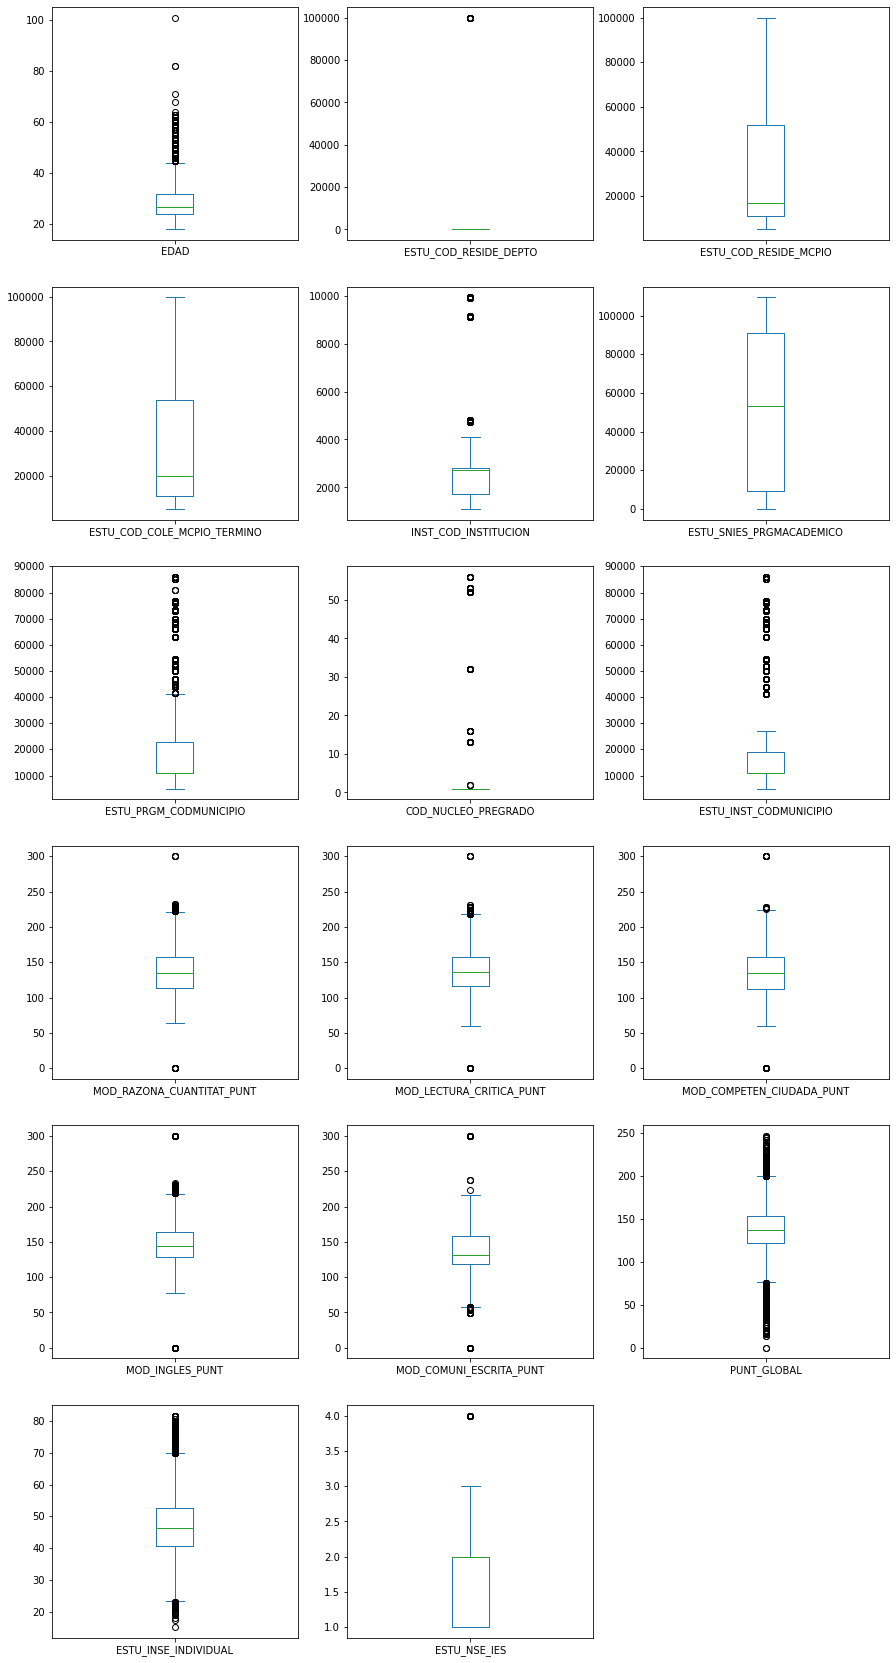

In [13]:
Saberpro_2021.loc[:,~Saberpro_2021.columns.isin(categoricas)].plot(kind = "box", subplots = True, figsize = (15,30), 
                                                                   layout = (6,3))

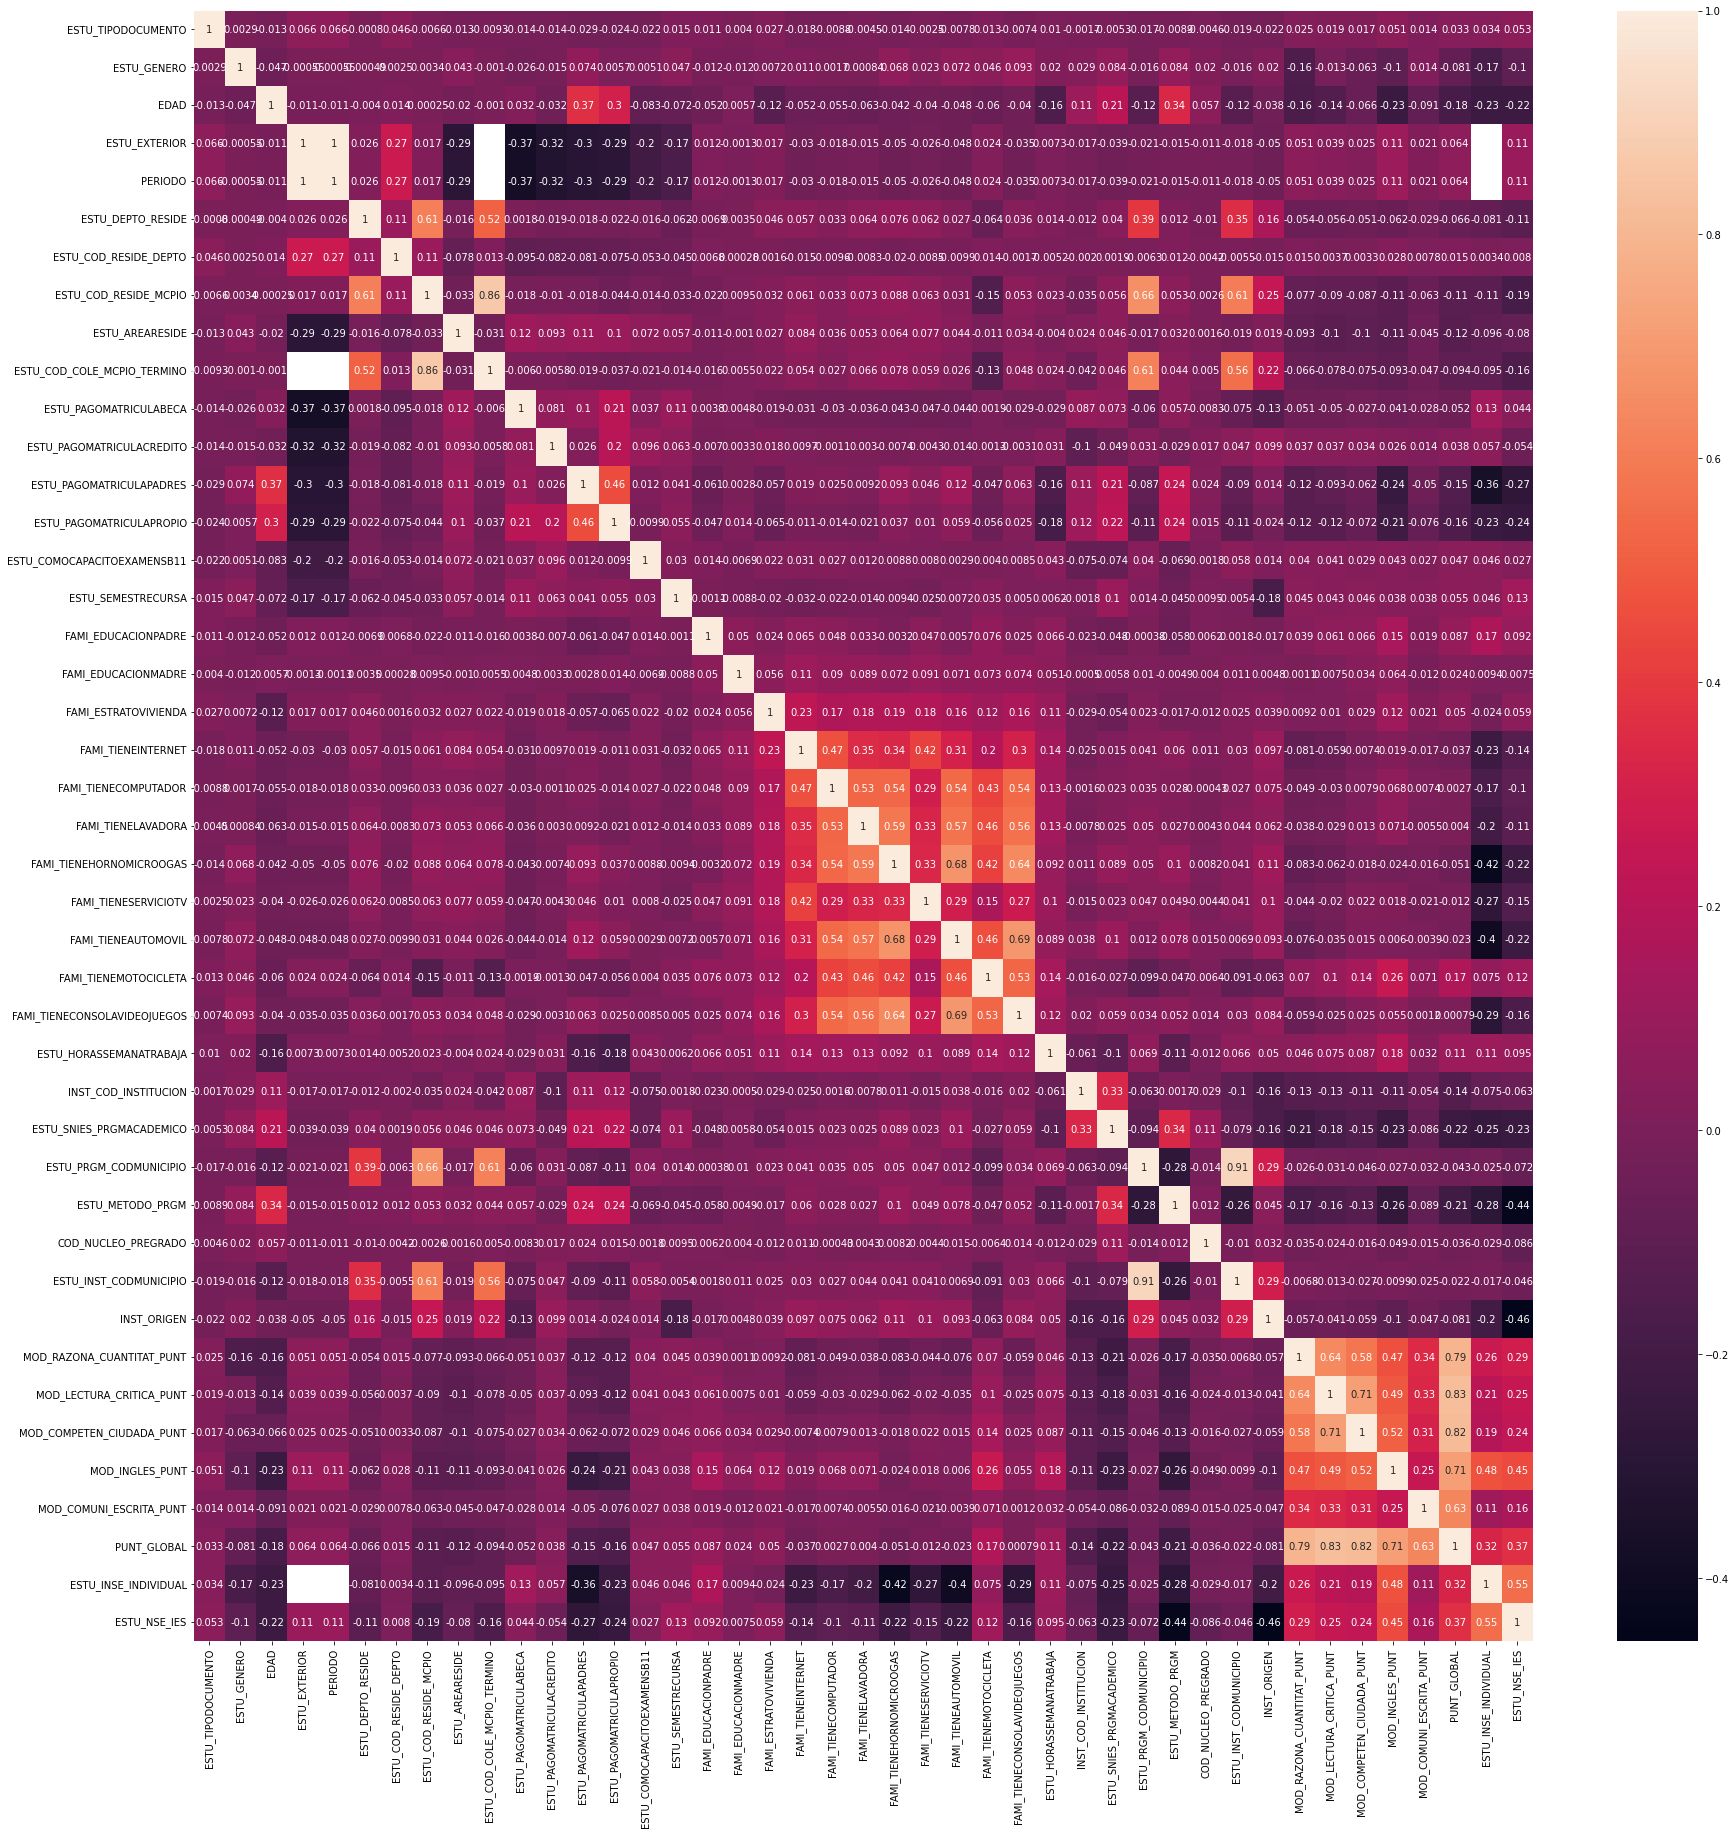

In [14]:
plt.figure(figsize = (30,30))
sns.heatmap(Saberpro_2021.corr(), annot = True)
plt.show()

## Exportar a Excel

In [15]:
with pd.ExcelWriter('Saberpro_2021_relevantes.xlsx') as writer:  
     Saberpro_2021.to_excel(writer, sheet_name='Saberpro_2021_relevantes')